In [ ]:
!pip install astropy

In [ ]:
!pip install healpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 30.5 MB/s eta 0:00:00


In [ ]:
from astropy.io import fits
import healpy as hp
map = fits.open('drive/MyDrive/353.fits')

I = map[1].data['I_STOKES']
Q = map[1].data['Q_STOKES']
U = map[1].data['U_STOKES']
I = hp.reorder(I, inp='NESTED', out='RING')
Q = hp.reorder(Q, inp='NESTED', out='RING')
U = hp.reorder(U, inp='NESTED', out='RING')

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import numpy as np
import healpy as hp

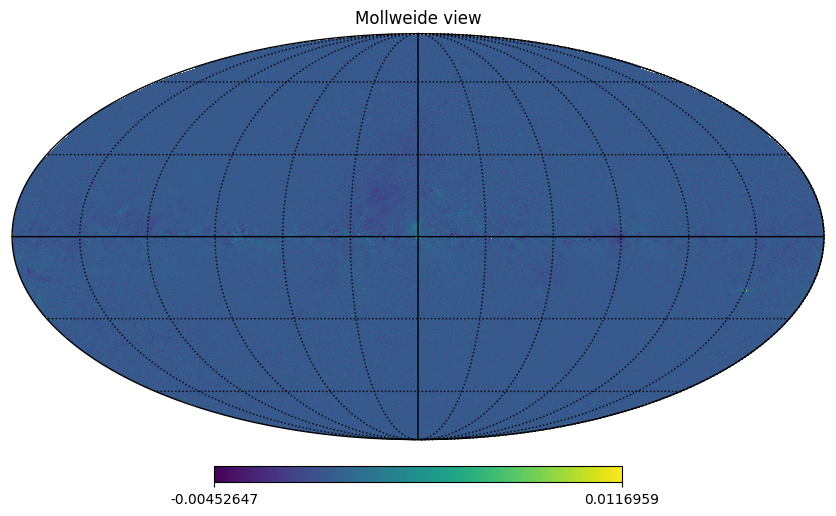

In [ ]:
NSIDE = 32
NPIX = hp.nside2npix(NSIDE)
m = np.arange(NPIX)
hp.mollview(U)
hp.graticule()

In [ ]:
vec1 = hp.ang2vec(np.pi / 180 * (90+12.5), np.pi * 166.5/ 180)
vec2 = hp.ang2vec(np.pi / 180 * (90+12.5), np.pi * 151.5/ 180)
vec3 = hp.ang2vec(np.pi / 180 * (90+27.5), np.pi * 151.5/ 180)
vec4 = hp.ang2vec(np.pi / 180 * (90+27.5), np.pi * 166.5/ 180)
vertices=np.array([vec1, vec2, vec3, vec4])
ipix=hp.query_polygon(nside=2048, vertices=vertices, nest=False)
print(ipix)

[30612856 30613196 30621047 ... 36863536 36863537 36863538]


In [ ]:
import scipy
from scipy import interpolate

<ipython-input-8-9908b4b2d508>:27: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f=scipy.interpolate.interp2d(x, y, mat, kind='cubic')
<ipython-input-8-9908b4b2d508>:30: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular 

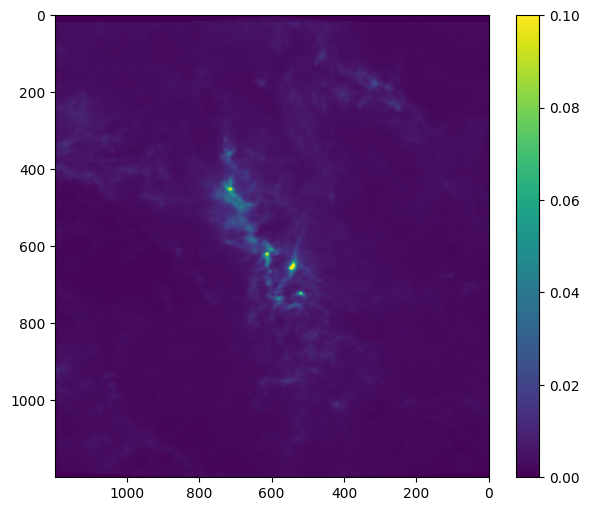

In [ ]:
m=I
def display_pixels(sel_pix):
    pix_list = []
    onerow = list([sel_pix[0],])
    for i in range(1,len(sel_pix)):
        if sel_pix[i] == sel_pix[i-1] + 1:
            onerow.append(sel_pix[i])
        else:
            pix_list.append(onerow)
            onerow = [sel_pix[i],]
    sizex = np.max([len(j) for j in pix_list])
    sizey = len(pix_list)
    mat = np.zeros((sizey, sizex))
    for j in range(sizey):
        start_ind = int( sizex/2 + 1/2 ) - int( len(pix_list[j])/2 + 1/2 )
        new_pix_list = pix_list[j]
        mat[j,start_ind : start_ind + len(pix_list[j])] = m[new_pix_list]
    return mat

mat=display_pixels(ipix)

x=np.arange(mat.shape[1])
y=np.arange(mat.shape[0])

xn=np.arange(1200)
yn=np.arange(1200)

f=scipy.interpolate.interp2d(x, y, mat, kind='cubic')

z=np.zeros((1200,1200))
z=f(xn*len(x)/1200, yn*len(y)/1200)

plt.figure(figsize=(7,6))
plt.imshow(z, aspect='auto', vmin=0, vmax=0.1)
plt.gca().invert_xaxis()
plt.colorbar()

<ipython-input-9-3fa27217b9e7>:47: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f=scipy.interpolate.interp2d(x, y, np.arctan2(q,u), kind='cubic')
<ipython-input-9-3fa27217b9e7>:50: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, 

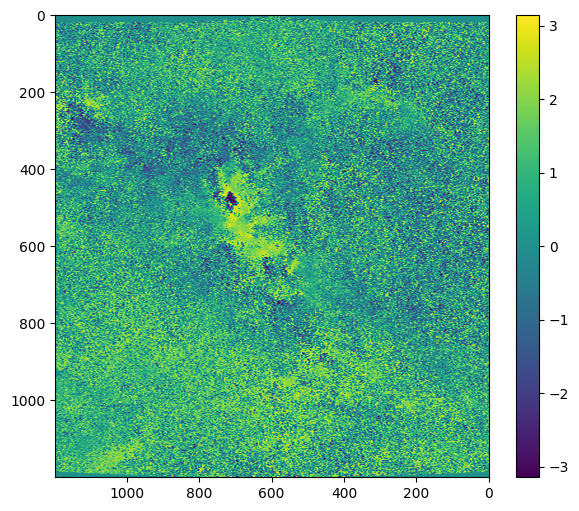

In [ ]:
m=Q
def display_pixels(sel_pix):
    pix_list = []
    onerow = list([sel_pix[0],])
    for i in range(1,len(sel_pix)):
        if sel_pix[i] == sel_pix[i-1] + 1:
            onerow.append(sel_pix[i])
        else:
            pix_list.append(onerow)
            onerow = [sel_pix[i],]
    sizex = np.max([len(j) for j in pix_list])
    sizey = len(pix_list)
    mat = np.zeros((sizey, sizex))
    for j in range(sizey):
        start_ind = int( sizex/2 + 1/2 ) - int( len(pix_list[j])/2 + 1/2 )
        new_pix_list = pix_list[j]
        mat[j,start_ind : start_ind + len(pix_list[j])] = m[new_pix_list]
    return mat
q=display_pixels(ipix)

m=U
def display_pixels(sel_pix):
    pix_list = []
    onerow = list([sel_pix[0],])
    for i in range(1,len(sel_pix)):
        if sel_pix[i] == sel_pix[i-1] + 1:
            onerow.append(sel_pix[i])
        else:
            pix_list.append(onerow)
            onerow = [sel_pix[i],]
    sizex = np.max([len(j) for j in pix_list])
    sizey = len(pix_list)
    mat = np.zeros((sizey, sizex))
    for j in range(sizey):
        start_ind = int( sizex/2 + 1/2 ) - int( len(pix_list[j])/2 + 1/2 )
        new_pix_list = pix_list[j]
        mat[j,start_ind : start_ind + len(pix_list[j])] = m[new_pix_list]
    return mat
u=display_pixels(ipix)

x=np.arange(u.shape[1])
y=np.arange(u.shape[0])

xn=np.arange(1200)
yn=np.arange(1200)

f=scipy.interpolate.interp2d(x, y, np.arctan2(q,u), kind='cubic')

a=np.zeros((1200,1200))
a=f(xn*len(x)/1200, yn*len(y)/1200)

plt.figure(figsize=(7,6))
plt.imshow(a, aspect='auto', vmin=-np.pi, vmax=np.pi)
plt.gca().invert_xaxis()
plt.colorbar()

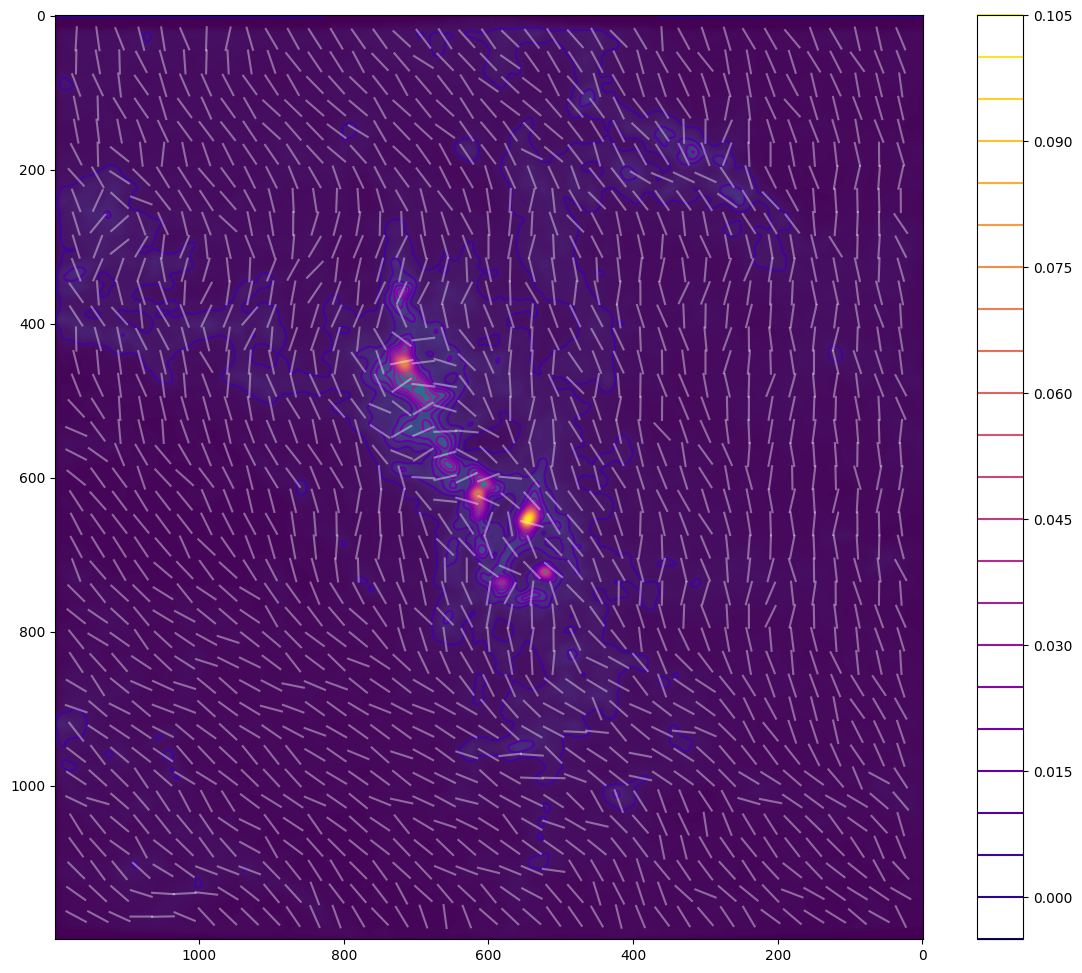

In [ ]:
k=15
step=30
sm=4

plt.figure(figsize=(14,12))

e=scipy.ndimage.gaussian_filter(z, [sm,sm], mode='constant')

plt.imshow(e, aspect='auto', alpha=1.0, vmax=0.1)
cs = plt.contour(e, levels=25, cmap='plasma')

a=a+np.pi/2

for i in range (step, 1200, step):
  for j in range (step, 1200, step):
    ang=np.mean(a[i-int(step/2):i+int(step/2), j-int(step/2):j+int(step/2)])
    x1, x2, y1, y2 = j+k*np.cos(ang), j-k*np.cos(ang), i+k*np.sin(ang), i-k*np.sin(ang)

    plt.plot([x1,x2], [y1,y2], color='white', alpha=0.4)

plt.gca().invert_xaxis()
plt.colorbar()

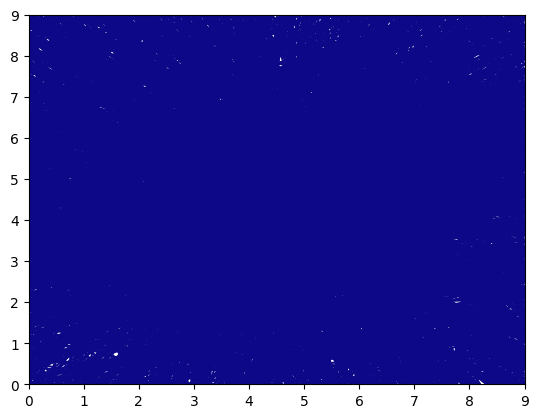

In [ ]:
n=6

rel=[]
av=[]

for i in range (step, 1200, step):
  for j in range (step, 1200, step):
    cutout=e[i-int(step/n):i+int(step/n) , j-int(step/n):j+int(step/n)]

    Iavg=np.mean(cutout)

    cs=plt.contour(cutout, levels=[Iavg], cmap='plasma')

    csa=cs.allsegs[0][:]
    g1, g2, h1, h2 = csa[0][0], csa[-1][0], csa[0][1], csa[-1][1]
    ori=np.mean(np.arctan2(h2-h1, g2-g1))

    ang=np.mean(a[i-int(step/2):i+int(step/2) , j-int(step/2):j+int(step/2)])

    if Iavg < 0.01:
      theta=np.abs(ang-ori)%np.pi
      theta=min(theta, np.pi-theta)
      rel.append(theta)
      av.append(Iavg)

1469


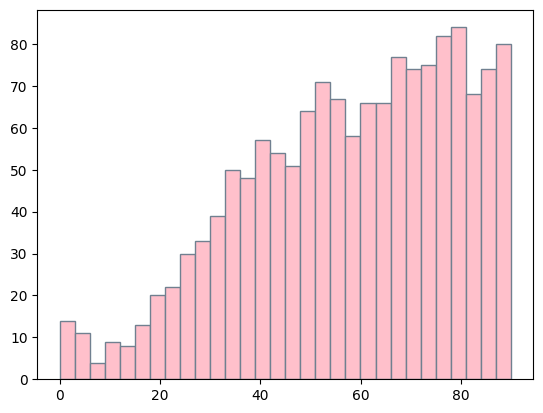

In [ ]:
rel=np.array(rel)
print(len(rel))
plt.hist(rel*180/np.pi, bins=30, color='pink', edgecolor='slategrey')
plt.show()

Text(0, 0.5, 'Intensity')

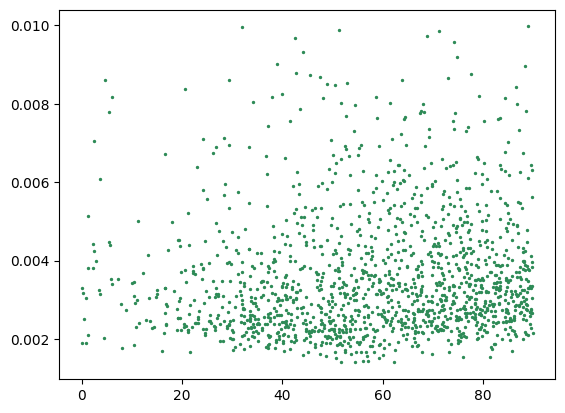

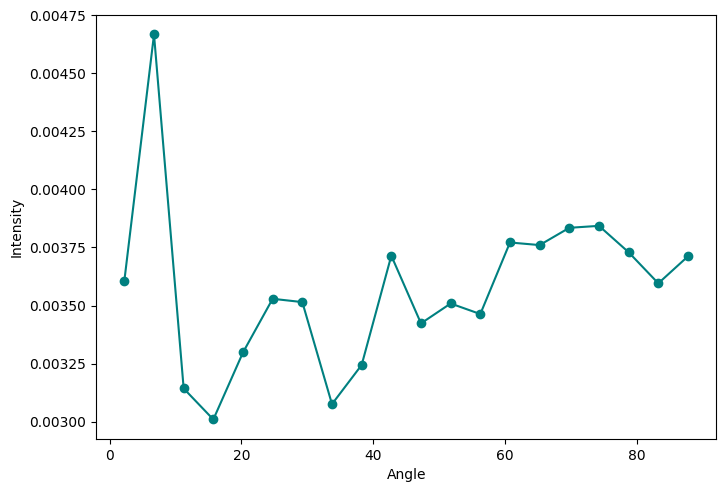

In [ ]:
plt.scatter(rel*180/np.pi, av, s=2, color='seagreen')

def binplot(x, y, x1, x2, n):
  y=np.array(y)
  x=np.array(x)
  xmid=[x1+(i+0.5)*(x2-x1)/n for i in range(n)]
  yarr=[]
  for m in xmid:
    ynew=y[np.where(np.abs(x-m)<=(x2-x1)/2/n)]
    yarr.append(np.mean(ynew))
  plt.plot(xmid, yarr, marker='o', color='teal')

plt.figure(figsize=(8, 5.5))
binplot(rel*180/np.pi, av, 0, 90, 20)
plt.xlabel('Angle')
plt.ylabel('Intensity')

In [ ]:
H=